# Pymaceuticals Inc.
---

### Analysis

- There is a strong correlation between mouse weight and tumor size. More analysis would be needed to determine if there was a causal link. 
- The mean tumor volume for mice on the Capomulin Regimen was higher for males at 40.78 vs for females at 40.59. But the median was higher for females at 42.33 vs 41.25 for the males. The female mice had a higher variance in tumor size at 27.43 vs 22.05 for the males. 
- Capomulin shows the smallest final tumor volume by average. Recommend more analysis to look at tumor growth over time. 

 

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results)


# Display the data table for preview
combined_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [80]:
# Checking the number of mice.
unique_mice_df = pd.DataFrame({'Mouse ID': combined_df['Mouse ID'].unique()})
mice_count_int = unique_mice_df.count()
print(mice_count_int)

Mouse ID    249
dtype: int64


In [81]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Tutor helped with duplicated_mice to show me a more dynamic way to remove duplicated mice than I was doing before
mice_duplicates_ids = combined_df.loc[combined_df.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicated_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

print(mice_duplicates)
print(duplicated_mice)

['g989']
['g989']


In [82]:
# Optional: Get all the data for the duplicate mouse ID. 
#mice_duplicates_df = combined_df.loc[combined_df['Mouse ID'] == 'g989']
duplicated_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

mice_duplicates_df = combined_df.loc[combined_df['Mouse ID'].isin(mice_duplicates)]
mice_duplicates_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

This mouse has duplicate timepoints with different values

In [83]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#tutor helped with this code
clean_mouse_df = combined_df[~combined_df['Mouse ID'].isin(duplicated_mice)]
#clean_mouse_df[
clean_mouse_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [84]:
# Checking the number of mice in the clean DataFrame.

clean_mouse_df['Mouse ID'].unique()
mice_count_int = len(clean_mouse_df['Mouse ID'].unique())

print(mice_count_int)

248


## Summary Statistics

In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

tumor_mean = []
tumor_median = []
tumor_var =[]
tumor_std = []
tumor_sem = []

drug_regimens = clean_mouse_df['Drug Regimen'].unique()

# Loop through each drug regimen and calculate the mean
for regimen in drug_regimens:
    # Filter the DataFrame for the current drug regimen
    regimen_data = clean_mouse_df[clean_mouse_df['Drug Regimen'] == regimen]

    # Calculate the statistics for the current drug regimen
    mean_tumor_volume = np.mean(regimen_data['Tumor Volume (mm3)'])
    median_tumor_volume = np.median(regimen_data['Tumor Volume (mm3)'])
    var_tumor_volume = np.var(regimen_data['Tumor Volume (mm3)'])
    std_tumor_volume = np.std(regimen_data['Tumor Volume (mm3)'])
    sem_tumor_volume = st.sem(regimen_data['Tumor Volume (mm3)'])

    # Append the statistics to the respective lists
    tumor_mean.append(mean_tumor_volume)
    tumor_median.append(median_tumor_volume)
    tumor_var.append(var_tumor_volume)
    tumor_std.append(std_tumor_volume)
    tumor_sem.append(sem_tumor_volume)

tumor_summary1_df = pd.DataFrame({
    "Drug Regimen": drug_regimens,
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_var,
    "Tumor Volume Std. Dev": tumor_std,
    "Tumor Volume Std. Err.": tumor_sem
})

tumor_summary1_df.sort_values(by='Drug Regimen', inplace=True)
tumor_summary1_df.set_index('Drug Regimen', inplace=True)
tumor_summary1_df.head()


Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.839296   
Ceftamin              52.591172            51.776157              39.069446   
Infubinol             52.884795            51.820584              42.886388   
Ketapril              55.235638            53.698743              68.188930   
Naftisol              54.331565            52.509285              65.817708   

              Tumor Volume Std. Dev  Tumor Volume Std. Err.  
Drug Regimen                                                 
Capomulin                  4.983904                0.329346  
Ceftamin                   6.250556                0.469821  
Infubinol                  6.548770                0.492236  
Ketapril                   8.257659                0.603860  
Naftisol                   8.112811                0.596466

In [86]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#Study group helped me correct this code instead of np.mean to 'mean', etc. Had to lookup .agg
#Referenced https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html
#Tutor recommended making funcs list that could be called twice to make for easier editing later. 
funcs = ['mean', 'median', 'var', 'std', 'sem']
agg_funcs = {"Tumor Volume (mm3)": funcs}

tumor_volume_stats_agg = clean_mouse_df.groupby("Drug Regimen").agg(agg_funcs)

tumor_volume_stats_agg.columns = funcs
#print(tumor_volume_stats_agg.shape)
tumor_volume_stats_agg

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

In [87]:
clean_mouse_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

## Bar and Pie Charts

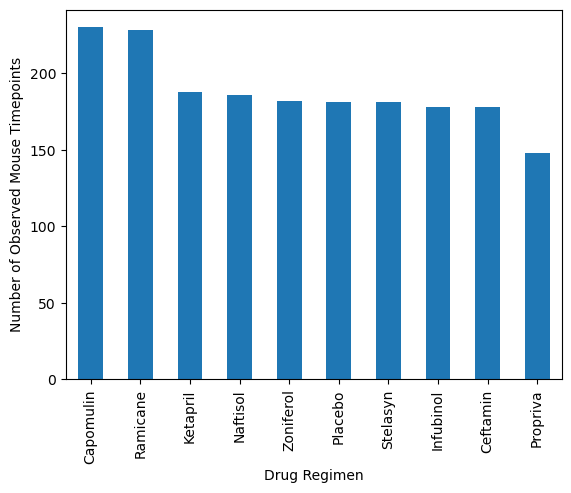

In [88]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
observed_mice = clean_mouse_df['Drug Regimen'].value_counts()
observed_mice.plot.bar(color='tab:blue')
plt.xlabel('Drug Regimen')
plt.ylabel("Number of Observed Mouse Timepoints")

# Show plot
plt.show()

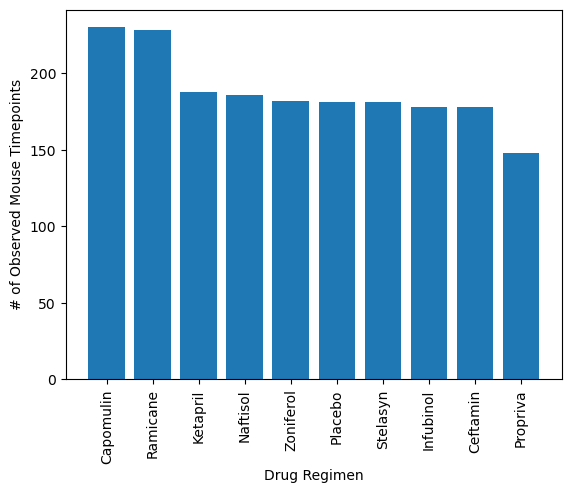

In [89]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(observed_mice))
plt.bar(x_axis, observed_mice, color='tab:blue', align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, observed_mice.index.values)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

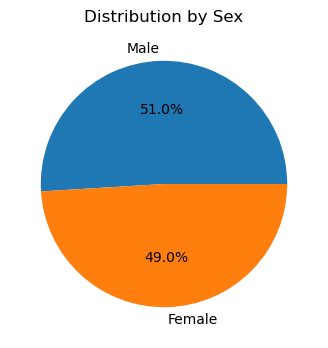

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Used sample from https://stackoverflow.com/questions/68909283/how-to-customize-pandas-pie-plot-with-labels-and-legend
mice_gender = clean_mouse_df['Sex'].value_counts()

size = mice_gender
#convert the genders to a list for the chart. Originally I was going to type these but this is more dynamic. 
gender_labels = mice_gender.index.tolist()

mice_gender.plot.pie(labels=gender_labels, autopct='%1.1f%%', figsize=(10, 4), title='Distribution by Sex', ylabel='')
plt.show()

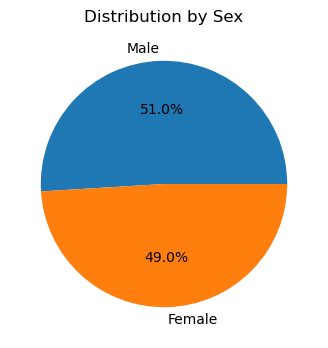

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

fig, ax = plt.subplots(figsize=(10, 4))
ax.pie(mice_gender, labels=labels, autopct='%1.1f%%')
ax.set_title('Distribution by Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [92]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_time_df = clean_mouse_df.groupby(['Mouse ID'])['Timepoint'].max()
greatest_time_df = greatest_time_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = greatest_time_df.merge(clean_mouse_df, on=['Mouse ID','Timepoint'], how='left')

print(merge_df.shape)
merge_df.head(3)


(248, 8)


Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a262         45      Placebo  Female          17          29   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4

In [93]:
# Put treatments into a list for for loop (and later for plot labels)
#Used ChatGPT to debug and help me correct my code for this part. Also worked on this with study group. 
sorted_vol_data = merge_df.sort_values('Tumor Volume (mm3)')

#create an empty list to capture each drug
#Study group pointed out I had this bit wrong: at first I thought we needed to capture each drug but the instructions clarify that we only need 4 specific drugs
# old code: treatments = sorted_vol_data['Drug Regimen'].unique()
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#variable for outliers
potential_outliers = {}

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = sorted_vol_data.loc[sorted_vol_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # Calculate the quartiles
    q1 = drug_data.quantile(0.25)
    q3 = drug_data.quantile(0.75)
    
    # Calculate the IQR
    iqr = q3 - q1
    
    # Calculate the lower and upper bounds for potential outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Determine outliers using upper and lower bounds
    potential_outliers[drug] = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    # Append the tumor volume data for plotting
    tumor_vol_data.append(drug_data)
    
for drug in treatments:
    print(f"{drug}'s potential outliers: {potential_outliers[drug]}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


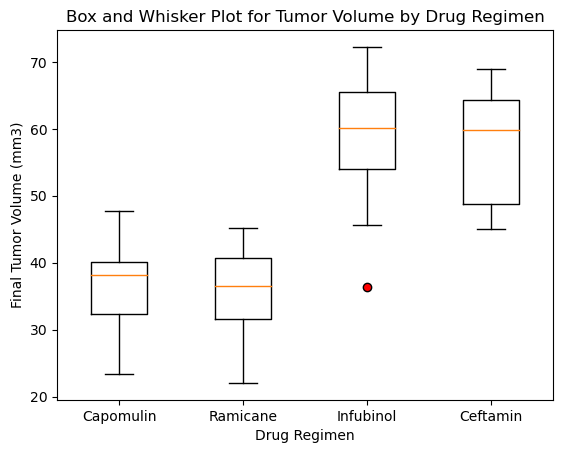

In [94]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments, showfliers=True, flierprops={"markerfacecolor": "red"})

plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Box and Whisker Plot for Tumor Volume by Drug Regimen")

#plt.legend()
plt.show()

## Line and Scatter Plots

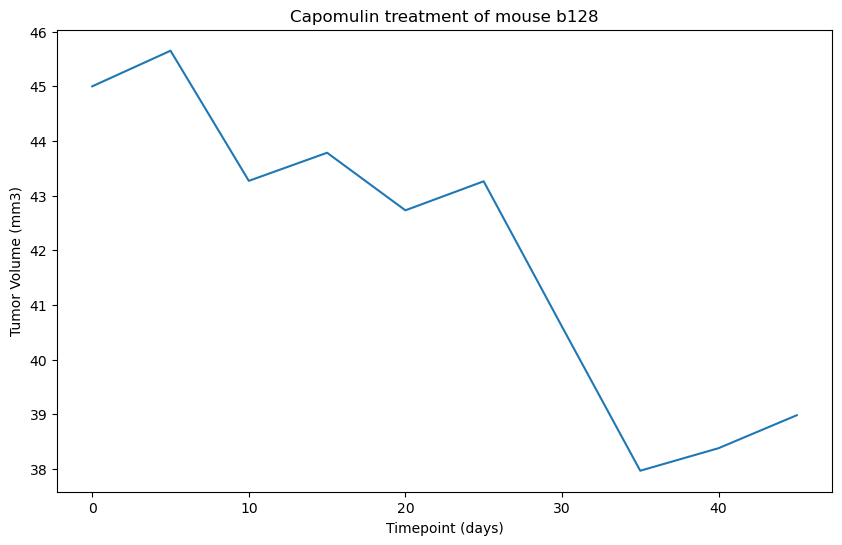

In [95]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'b128'
capomulin_data = clean_mouse_df[clean_mouse_df["Mouse ID"] == mouse_id]
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse b128")
plt.show()

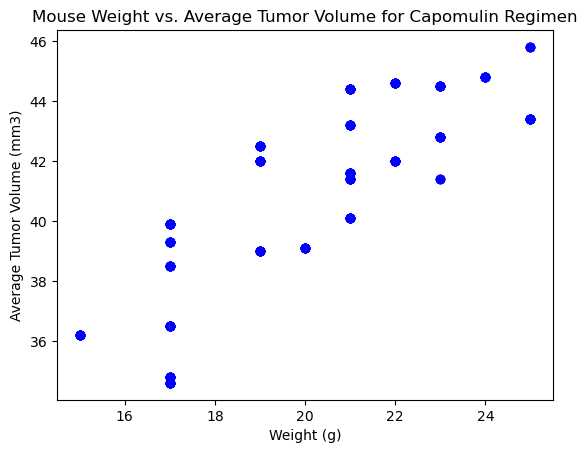

In [96]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = clean_mouse_df[clean_mouse_df["Drug Regimen"] == 'Capomulin']
# capomulin.head()

# Group the data by mouse ID and calculate the average tumor volume for each mouse
#In the coreleation I was getting 0.83 instead of 0.84 as the answer suggested. 
#Used ChatGPT to help get teh .round(1)
average_tumor_volume = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().round(1).reset_index()

# average_tumor_volume.head()

# Merge the average tumor volume data back with the original DataFrame to include the weight
capomulin_avg_tumor_volume = pd.merge(average_tumor_volume, capomulin[['Mouse ID', 'Weight (g)']], on='Mouse ID')

capomulin_avg_tumor_volume.head()

x_axis = capomulin_avg_tumor_volume['Weight (g)']
y_axis = capomulin_avg_tumor_volume['Tumor Volume (mm3)']
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()

In [97]:
clean_mouse_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


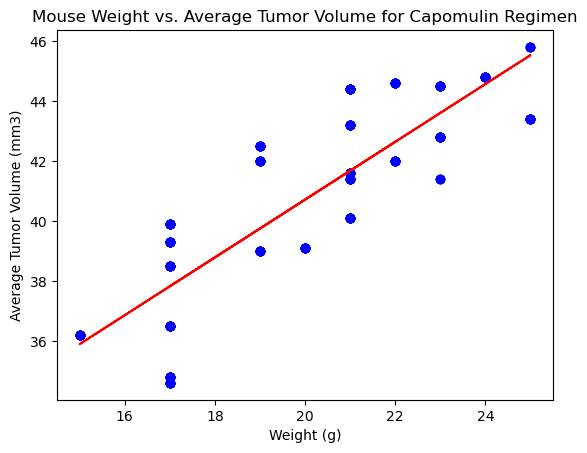

In [98]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_avg_tumor_volume['Weight (g)'], capomulin_avg_tumor_volume['Tumor Volume (mm3)'])

# Display the correlation
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")

x_axis = capomulin_avg_tumor_volume['Weight (g)']
y_axis = capomulin_avg_tumor_volume['Tumor Volume (mm3)']
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()



Extra for Analysis 


In [99]:
sorted_vol_data['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Propriva', 'Placebo',
       'Ceftamin', 'Ketapril', 'Stelasyn', 'Naftisol', 'Zoniferol'],
      dtype=object)

In [100]:
top_regimens = sorted_vol_data.head()
bottom_regimens = sorted_vol_data.tail()

top_regimens


Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
96      k403         45     Ramicane    Male          21          16   
174     s185         45    Capomulin  Female           3          17   
121     m601         45    Capomulin    Male          22          17   
226     x401         45    Capomulin  Female          16          15   
70      g791         45     Ramicane    Male          11          16   

     Tumor Volume (mm3)  Metastatic Sites  
96            22.050126                 1  
174           23.343598                 1  
121           28.430964                 1  
226           28.484033                 0  
70            29.128472                 1

In [106]:
tumor_volume_stats_agg_by_gender = clean_mouse_df.groupby(["Drug Regimen", "Sex"]).agg(agg_funcs)
tumor_volume_stats_agg_by_gender

Tumor Volume (mm3)                                  \
                                  mean     median        var       std   
Drug Regimen Sex                                                         
Capomulin    Female          40.591944  42.339416  27.432465  5.237601   
             Male            40.780898  41.258342  22.050378  4.695783   
Ceftamin     Female          52.746823  52.066826  39.291629  6.268304   
             Male            52.424661  51.010551  39.696586  6.300523   
Infubinol    Female          53.603511  52.780489  43.871657  6.623568   
             Male            52.062168  50.336553  41.519531  6.443565   
Ketapril     Female          53.478945  52.174629  51.406795  7.169853   
             Male            56.019393  55.219168  74.654962  8.640310   
Naftisol     Female          54.603113  52.855576  73.683803  8.583927   
             Male            54.098033  52.026639  60.274497  7.763665   
Placebo      Female          54.542857  52.909990  62.653090  7.915371   
             Male            53.376035  51.532603  59.252319  7.697553   
Propriva     Female          52.936324  50.965298  56.108124  7.490536   
             Male            51.889446  50.094754  35.354182  5.945938   
Ramicane     Female          41.452075  42.361826  14.622354  3.823919   
             Male            39.623145  39.915774  26.776859  5.174636   
Stelasyn     Female          54.951186  52.657265  70.168130  8.376642   
             Male            53.194907  52.088204  42.854035  6.546299   
Zoniferol    Female          53.953839  52.604367  51.835074  7.199658   
             Male            51.881546  49.825004  40.179074  6.338697   

                               
                          sem  
Drug Regimen Sex               
Capomulin    Female  0.462943  
             Male    0.464952  
Ceftamin     Female  0.653516  
             Male    0.679403  
Infubinol    Female  0.679564  
             Male    0.707273  
Ketapril     Female  0.941448  
             Male    0.757805  
Naftisol     Female  0.925629  
             Male    0.776367  
Placebo      Female  0.783738  
             Male    0.866042  
Propriva     Female  0.959065  
             Male    0.637471  
Ramicane     Female  0.444522  
             Male    0.416984  
Stelasyn     Female  0.809801  
             Male    0.760992  
Zoniferol    Female  0.659992  
             Male    0.798601

In [107]:
tumor_volume_stats_agg_by_age = clean_mouse_df.groupby(["Drug Regimen", "Age_months"]).agg(agg_funcs)
tumor_volume_stats_agg_by_age

Tumor Volume (mm3)                                  \
                                      mean     median        var       std   
Drug Regimen Age_months                                                      
Capomulin    1                   43.804771  43.629865   3.499818  1.870780   
             3                   38.533019  38.560914  38.322044  6.190480   
             7                   42.274468  42.208197  11.226943  3.350663   
             8                   36.509212  34.678551  26.464234  5.144340   
             9                   41.963636  42.996848   7.740275  2.782135   
...                                    ...        ...        ...       ...   
Zoniferol    16                  56.627561  57.089569  60.542485  7.780905   
             19                  50.653596  47.682414  34.333198  5.859454   
             20                  59.274800  59.547335  99.902077  9.995103   
             21                  46.364105  46.617671   1.579188  1.256658   
             24                  53.038586  51.374837  41.631221  6.452226   

                                   
                              sem  
Drug Regimen Age_months            
Capomulin    1           0.418319  
             3           1.130222  
             7           0.749231  
             8           1.626783  
             9           0.879788  
...                           ...  
Zoniferol    16          2.460538  
             19          1.381086  
             20          3.160729  
             21          0.725532  
             24          2.040373  

[149 rows x 5 columns]